In [1]:
import pandas as pd
import kinproc
from Kinematics_Dataframe import Kinematics_Dataframe
from utils import *

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import graphviz

In [59]:
def sensitivity_specificity(confusion_matrix, print_vals=False):
    true_positive = confusion_matrix[0][0]
    true_negative = confusion_matrix[1][1]
    false_positive = confusion_matrix[0][1]
    false_negative = confusion_matrix[1][0]

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = sensitivity
    f1 = 2 * (precision * recall) / (precision + recall)
    

    if print_vals:
        print("Accuracy: ", 100*np.round((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative),4))
        print("Sensitivity: ", 100*np.round(sensitivity,4))
        print("Specificity: ", 100*np.round(specificity,4))
        #print("Precision: ", 100*np.round(precision,4))
        #print("Recall: ", 100*np.round(recall,4))
        print("F1: ", np.round(f1,4))

    return sensitivity, specificity

# Creating Dataframe
Here we are creating the dataframe for all the kinematics that we have available. The kinematics dataframe class is being used to store everything so we have perform different operations on it and keep all those functions organized.

In [3]:
my_df = Kinematics_Dataframe()

train_subjects = ["Actiyas", "GMK", "Lima", "Toshi", "Ghent", "Florent"]
test_subjects = ["Arizona"]

my_df.initialize_study_directories_into_dataframe(
    HOME_DIR="./supervised_kinematics_new/",
    studies=train_subjects,
)
test_df = Kinematics_Dataframe()
test_df.initialize_study_directories_into_dataframe(
    HOME_DIR="./supervised_kinematics_new/",
    studies=test_subjects,
)

In [4]:
#flexext = [x[3] for x in my_df.df["kin"]]
#idxs = np.where(np.array(flexext)< -10)[0]
#print(idxs.shape)
#for i in idxs:
#    
#    print(my_df.df.iloc[i])

# Adding symmetry trap calculations
Here we want to calculate a few things:
1. The symmetric pose
2. The distance between the symmetric pose and the input pose
3. The symmetric relative kinematics

In [5]:
add_symmetry_trap_columns_to_dataframe(my_df)
add_symmetry_trap_columns_to_dataframe(test_df)

### The following has been converted into a single function

In [6]:
#sym_trap_distance = []
#sym_trap_pose = []

#for i in range(0, my_df.df.shape[0]):
#    sym_trap_distance.append(solid_angle_distance_to_dual(my_df.df["tib"][i]))
#    sym_trap_pose.append(np.round(sym_trap_dual(my_df.df["tib"][i]), 3))
#my_df.add_column("sym_trap_distance", sym_trap_distance)
#my_df.add_column("sym_trap_pose", sym_trap_pose)

In [7]:
# calculating relative pose for tib dual
#dual_pose = []
#for i in range(0, my_df.df.shape[0]):
#    tib_dual_pose = my_df.df["sym_trap_pose"][i]
#    fem_pose = my_df.df["fem"][i]
#    side = my_df.df["Side"][i]
#    dual_pose.append(
#        np.round(
#            kinproc.process.relative_kinematics(
#                fem_pose=fem_pose, tib_pose=tib_dual_pose, side=side
#            ),
#            3,
#        )
#    )
#my_df.add_column("kin_dual", dual_pose)

# save the dataframe
my_df.df.to_pickle("./all_kinematics_dataframe.pkl")

12074


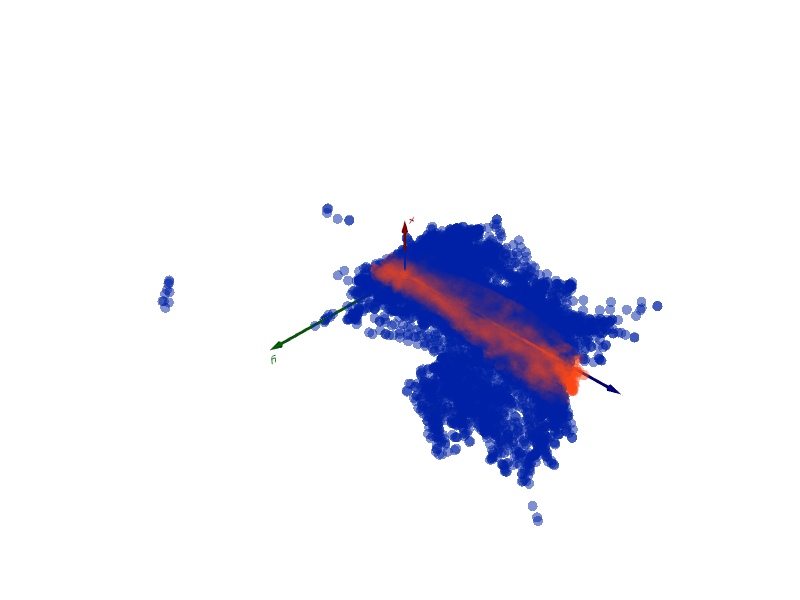

In [75]:
sym_dist_thresh = -1
cond = "greater"
cond_column = "sym_trap_distance"

kin_z = my_df.grab_index_from_column(
    "kin",
    3,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
kin_x = my_df.grab_index_from_column(
    "kin",
    4,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
kin_y = my_df.grab_index_from_column(
    "kin",
    5,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
dual_z = my_df.grab_index_from_column(
    "kin_dual",
    3,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
dual_x = my_df.grab_index_from_column(
    "kin_dual",
    4,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
dual_y = my_df.grab_index_from_column(
    "kin_dual",
    5,
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
sym_dist = my_df.grab_data_from_column(
    "sym_trap_distance",
    condition=cond,
    condition_column=cond_column,
    condition_threshold=sym_dist_thresh,
)
# want to create a 3d scatter plot of the kinematics

print(len(kin_x))
from vedo import *
import vedo

kin = Points([kin_x, kin_y, kin_z], c=(250,70,22), r=10, alpha=0.3)
dual = Points([dual_x, dual_y, dual_z], c=(0,33,165), r=10, alpha=0.5)

vedo.show(kin, dual, axes=3, viewup="x", interactive=1, mode="image")
#vedo.show(kin, axes=3, viewup="x", interactive=1, mode="image")

Min/Max kin_x:  -24.365 11.766
Min/Max kin_y:  -25.253 22.018
Min/Max kin_z:  -19.568 154.696
Min/Max dual_x:  -79.845 37.786
Min/Max dual_y:  -108.211 113.007
Min/Max dual_z:  -179.633 172.233


Text(0.5, 0, 'Flexion/Extension')

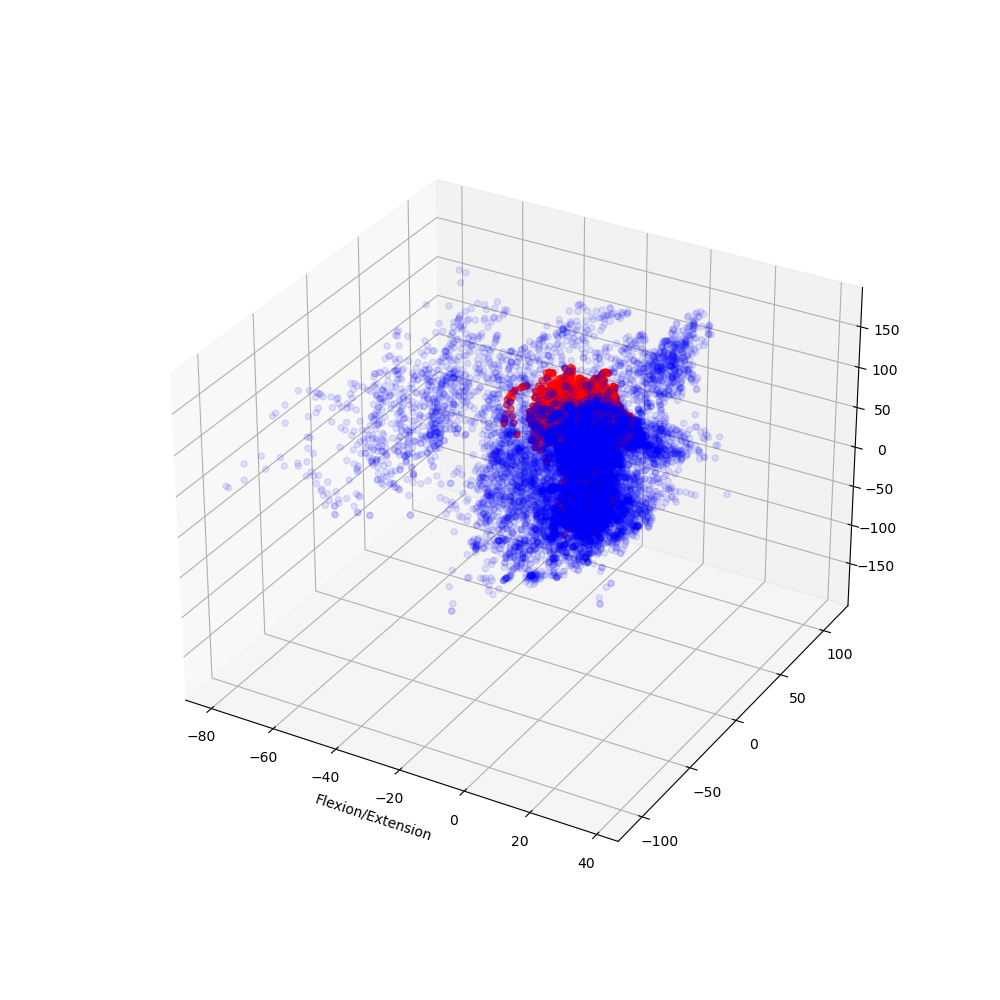

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

# plotting kin and dual
print("Min/Max kin_x: ", np.min(kin_x), np.max(kin_x))
print("Min/Max kin_y: ", np.min(kin_y), np.max(kin_y))
print("Min/Max kin_z: ", np.min(kin_z), np.max(kin_z))
print("Min/Max dual_x: ", np.min(dual_x), np.max(dual_x))
print("Min/Max dual_y: ", np.min(dual_y), np.max(dual_y))
print("Min/Max dual_z: ", np.min(dual_z), np.max(dual_z))

ax.scatter(kin_x, kin_y, kin_z, c="red", marker="o", alpha=0.6)
ax.scatter(dual_x, dual_y, dual_z, c="blue", marker="o", alpha=0.1)
ax.set_xlabel("Flexion/Extension")

# Organizing Data into {data,label} pairs

Here, we are going to try and get all the data pushed together so that it can be represented as a data/label pairing. We will also proabably try to randomize the order once everything has been put together so that the networks don't get upset at ordering.

To start, I think we are going to do 3 relative rotation measurements (easy to get) along with the distance to the symmetry trap (you can grab this from the tibial pose). This should let us determine the relative tibiofemoral kinematics that might be causing some issues. If this gets a bit too dependent on the side that the implant falls on, we might just move to using the absolute kinematics between the two, so that it does not depend on the side of the implant (this can be done easily with transformation matrices).

In [10]:
from numpy import random
# random state for reproducibility
random.seed(42)

X = np.array([kin_x, kin_y, kin_z, sym_dist]).T
# make an array of 1 as target for kinematics
t = np.ones((len(kin_x), 1))

# append dual pose to X for more targets
X = np.append(X, np.array([dual_x, dual_y, dual_z, sym_dist]).T, axis=0)
# append 0 as target for the dual pose
t = np.append(t, np.zeros((len(kin_x), 1)), axis=0)
t = t.ravel()

# randomize the order of the data
idx = np.random.permutation(len(X))

X_random = X[idx]
t_random = t[idx]

# save the data
np.save("X.npy", X_random)
np.save("t.npy", t_random)

# Testing out some ensemble learning
Here, we are doing some quick tests to see what information we can get out of the data. So far, we are looking at some different methods of ensemble learning, so that multiple models can be assessed for performance. We can also break down some of the measurements.

Scikit learn documentation: https://scikit-learn.org/stable/modules/ensemble.html

### Test Train Split
Want to organize the data efficiently by the distance to symmetry trap so that we get full picture of the data.

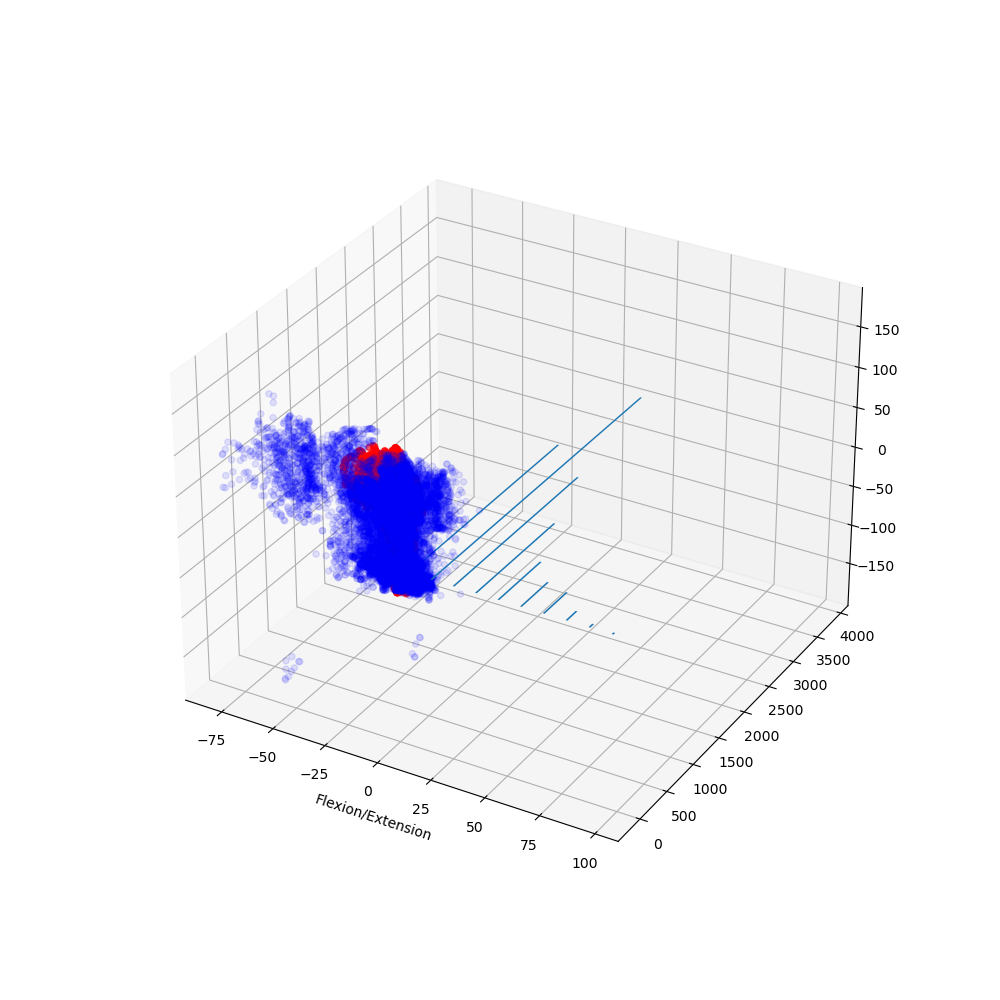

In [11]:
# want to do stratified test traing split based on sym_dist

plt.hist(sym_dist, bins=10)
plt.show()

sym_trap_cat = pd.cut(X_random[:, 3], bins=[0, 10, 20, 30, 500], labels=[1, 2, 3, 4])

In [12]:
# try out a very naive scikit learn classifier
# adding scikitlearn intelex to speed things up on the CPU.
from sklearnex import patch_sklearn

patch_sklearn()
from sklearn import svm
import sklearn as sk
from sklearn.model_selection import StratifiedKFold

clf = svm.SVC()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# split the data into test train using stratefied data

from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test, sym_trap_train, sym_trap_test = train_test_split(
    X_random,
    t_random,
    sym_trap_cat,
    test_size=0.33,
    shuffle=True,
    random_state=42,
    stratify=sym_trap_cat,
)
# X_train, X_test, t_train, t_test = train_test_split(X_random, t_random, test_size=0.33, random_state=42)

np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("t_train.npy", t_train)
np.save("t_test.npy", t_test)

clf.fit(X_train, t_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


SVC()

In [13]:
skf.get_n_splits(X_random, sym_trap_cat)

5

In [14]:
# test the classifier
clf.predict(X_test)

# check the accuracy
clf.score(X_test, t_test)

# do some different performance metrics
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(t_test, clf.predict(X_test))

true_positive = cm[0][0]
true_negative = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]

print("True Positive: ", true_positive)
print("True Negative: ", true_negative)
print("False Positive: ", false_positive)
print("False Negative: ", false_negative)

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

True Positive:  2897
True Negative:  3790
False Positive:  1074
False Negative:  208
Sensitivity:  0.9330112721417069
Specificity:  0.7791940789473685


In [15]:
score = clf.score(X_test, t_test)
print(np.round(100 * score, 2))

83.91


In [16]:
# try out a different classifier
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=3, random_state=0)
clf2.fit(X_train, t_train)

# test the classifier
clf2.predict(X_test)

# check the accuracy
score = clf2.score(X_test, t_test)
print(score)

# do some different performance metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(t_test, clf2.predict(X_test)))

0.8265779897101267
[[2938 1033]
 [ 349 3649]]


In [17]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf2.estimators_[0], out_file=None)
graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

# SVM Hyperparameter Tuning
Here, we are going to use some of the build in cross-validation schemes in SKLearn to tune the SVM and squeeze out better performance. This should drastically improve the overall output, considering such high performance without any tuning at all.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C": [1, 10, 100, 1000], "gamma": [0.001, 0.0001], "kernel": ["rbf"]},
]
tuned_svc = svm.SVC()
gridsearch = GridSearchCV(tuned_svc, param_grid, refit=True, verbose=2, n_jobs=-1, cv=skf.get_n_splits
                          (X_random, sym_trap_cat))
gridsearch.fit(X_train, t_train)

poly_param_grid = [
    {"C": [1, 10, 100, 1000], "kernel": ["poly"], "degree": [2]},
]
poly_tuned_svc = svm.SVC()
poly_gridsearch = GridSearchCV(poly_tuned_svc, poly_param_grid, refit=True, verbose=2, n_jobs=-1, cv=skf.get_n_splits
                          (X_random, sym_trap_cat))
poly_gridsearch.fit(X_train, t_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.7s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   2.8s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   3.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   3.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   3.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   3.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'degree': [2],
                          'kernel': ['poly']}],
             verbose=2)

In [19]:
# printing the best parameters

print(gridsearch.best_params_)


print(gridsearch.best_estimator_.score(X_test, t_test))

cm2 = confusion_matrix(t_test, gridsearch.best_estimator_.predict(X_test))

print(cm2)
sensitivity_specificity(cm2, print_vals=True)

best_clf = gridsearch.best_estimator_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9208181704103401
[[3536  435]
 [ 196 3802]]
Accuracy:  92.08
Sensitivity:  94.75
Specificity:  89.73
Precision:  89.05
Recall:  94.75
F1:  0.9181


In [20]:
print(poly_gridsearch.best_params_)
print(poly_gridsearch.best_estimator_.score(X_test, t_test))

cm3 = confusion_matrix(t_test, poly_gridsearch.best_estimator_.predict(X_test))

sensitivity_specificity(cm3, print_vals=True)

best_poly_clf = poly_gridsearch.best_estimator_

{'C': 1000, 'degree': 2, 'kernel': 'poly'}
0.8765215208934621
Accuracy:  87.64999999999999
Sensitivity:  92.54
Specificity:  83.8
Precision:  81.82000000000001
Recall:  92.54
F1:  0.8685


# K-Nearest Neighbors

In [21]:
from sklearn import neighbors

neighbor_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)

# neighbor_classifier.fit(X_train, t_train)

# print out accuracy

# neighbor_classifier.score(X_test, t_test)

# tune over number of neighbors

param_grid = [
    {
        "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "weights": ["uniform", "distance"],
        "p": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    },
]

neighbor_gridsearch = GridSearchCV(
    neighbor_classifier, param_grid, refit=True, verbose=2, cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1
)

neighbor_gridsearch.fit(X_train, t_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=2, w

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform', 'distance']}],
             verbose=2)

In [22]:
# best estimator

print(
    "Best Estimator: ",
    neighbor_gridsearch.best_estimator_,
    neighbor_gridsearch.best_estimator_.score(X_test, t_test),
)
nn_cm = confusion_matrix(t_test, neighbor_gridsearch.best_estimator_.predict(X_test))

sensitivity_specificity(nn_cm, print_vals=True)

Best Estimator:  KNeighborsClassifier(n_neighbors=4, p=1, weights='distance') 0.9312335299284729
Accuracy:  93.12
Sensitivity:  93.96
Specificity:  92.32000000000001
Precision:  92.12
Recall:  93.96
F1:  0.9303


(0.9396352427433856, 0.9232090284592738)

# ADABoost


In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
adaboost_param_grid = [{"n_estimators": [50, 100, 200, 300, 400, 500]}]

ada_grid = GridSearchCV(
    AdaBoostClassifier(), adaboost_param_grid, refit=True, verbose=2, cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1
)

ada_grid.fit(X_train, t_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.2s
[CV] END ...................................n_estimators=100; total time=   1.2s
[CV] END ...................................n_estimators=100; total time=   1.3s
[CV] END ...................................n_estimators=200; total time=   2.2s
[CV] END ...................................n_est

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': [50, 100, 200, 300, 400, 500]}],
             verbose=2)

In [25]:
print(ada_grid.best_estimator_.score(X_test, t_test))
ada_cm = confusion_matrix(t_test, ada_grid.best_estimator_.predict(X_test))
sensitivity_specificity(ada_cm, print_vals=True)

0.8878152842263772
Accuracy:  88.78
Sensitivity:  91.08000000000001
Specificity:  86.74
Precision:  85.9
Recall:  91.08000000000001
F1:  0.8841


(0.9108144192256342, 0.8674242424242424)

# Histogram Gradient Boosting

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [27]:
histgradboostclf = HistGradientBoostingClassifier()

hist_params = {"learning_rate": [0.1, 0.05, 0.01]}

hist_grid = GridSearchCV(histgradboostclf, hist_params, refit=True, verbose=2, cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1)

hist_grid.fit(X_train, t_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .................................learning_rate=0.05; total time=   0.4s
[CV] END ..................................learning_rate=0.1; total time=   0.4s
[CV] END ..................................learning_rate=0.1; total time=   0.4s
[CV] END ..................................learning_rate=0.1; total time=   0.4s
[CV] END .................................learning_rate=0.05; total time=   0.4s
[CV] END .................................learning_rate=0.01; total time=   0.4s
[CV] END .................................learning_rate=0.05; total time=   0.4s
[CV] END .................................learning_rate=0.05; total time=   0.4s
[CV] END .................................learning_rate=0.01; total time=   0.4s
[CV] END .................................learning_rate=0.05; total time=   0.4s
[CV] END ..................................learning_rate=0.1; total time=   0.5s
[CV] END ..................................learni

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01]}, verbose=2)

In [28]:
print(hist_grid.best_estimator_.score(X_test, t_test))
hist_cm = confusion_matrix(t_test, hist_grid.best_estimator_.predict(X_test))
sensitivity_specificity(hist_cm, print_vals=True)

0.9311080436692182
Accuracy:  93.11
Sensitivity:  94.98
Specificity:  91.4
Precision:  90.98
Recall:  94.98
F1:  0.9294


(0.9497896950578338, 0.9140456182472989)

# Quadratic Discriminant Analysis

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [30]:
quad_clf = QuadraticDiscriminantAnalysis()

quad_params = {"reg_param": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}

quad_grid = GridSearchCV(quad_clf, quad_params, refit=True, verbose=2, cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1)

quad_grid.fit(X_train, t_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................reg_param=0.0; total time=   0.0s
[CV] END ......................................reg_param=0.0; total time=   0.0s
[CV] END ......................................reg_param=0.0; total time=   0.0s
[CV] END ......................................reg_param=0.0; total time=   0.0s
[CV] END ......................................reg_param=0.1; total time=   0.0s
[CV] END ......................................reg_param=0.1; total time=   0.0s
[CV] END ......................................reg_param=0.1; total time=   0.0s
[CV] END ......................................reg_param=0.1; total time=   0.0s
[CV] END ......................................reg_param=0.2; total time=   0.0s
[CV] END ......................................reg_param=0.3; total time=   0.0s
[CV] END ......................................reg_param=0.3; total time=   0.0s
[CV] END ......................................re

GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]},
             verbose=2)

In [31]:
print(quad_grid.best_estimator_.score(X_test, t_test))
quad_cm = confusion_matrix(t_test, quad_grid.best_estimator_.predict(X_test))
sensitivity_specificity(quad_cm, print_vals=True)

# parameters
print(quad_grid.best_params_, quad_grid.best_estimator_)
# plotting boundary
from mlxtend.plotting import plot_decision_regions

0.8185468691178316
Accuracy:  81.85
Sensitivity:  85.14
Specificity:  79.16
Precision:  77.03
Recall:  85.14
F1:  0.8088
{'reg_param': 0.4} QuadraticDiscriminantAnalysis(reg_param=0.4)


# Bagging Estimator

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bagging_clf = BaggingClassifier()
bagging_params = {
    "n_estimators": [10, 50, 100, 200, 300, 400, 500],
    "max_samples": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "n_jobs": [-1],
}

bagging_grid = GridSearchCV(bagging_clf, bagging_params, refit=True, verbose=2, cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1)

bagging_grid.fit(X_train, t_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ........max_samples=0.1, n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END ........max_samples=0.1, n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END ........max_samples=0.1, n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END ........max_samples=0.1, n_estimators=10, n_jobs=-1; total time=   0.1s
[CV] END ........max_samples=0.1, n_estimators=10, n_jobs=-1; total time=   0.2s
[CV] END ........max_samples=0.1, n_estimators=50, n_jobs=-1; total time=   0.3s
[CV] END ........max_samples=0.1, n_estimators=50, n_jobs=-1; total time=   0.4s
[CV] END ........max_samples=0.1, n_estimators=50, n_jobs=-1; total time=   0.4s
[CV] END ........max_samples=0.1, n_estimators=50, n_jobs=-1; total time=   0.4s
[CV] END ........max_samples=0.1, n_estimators=50, n_jobs=-1; total time=   0.5s
[CV] END .......max_samples=0.1, n_estimators=100, n_jobs=-1; total time=   0.7s
[CV] END .......max_samples=0.1, n_estimators=1

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [10, 50, 100, 200, 300, 400, 500],
                         'n_jobs': [-1]},
             verbose=2)

In [34]:
print(bagging_grid.best_estimator_.score(X_test, t_test))
bag_cm = confusion_matrix(t_test, bagging_grid.best_estimator_.predict(X_test))
specificity, sensitivity = sensitivity_specificity(bag_cm, print_vals=True)

0.9332413100765466
Accuracy:  93.32000000000001
Sensitivity:  94.28
Specificity:  92.41
Precision:  92.19000000000001
Recall:  94.28
F1:  0.9323


# Stacked Generalization 
Here, we use the meta-learning algorithm to stack the performance of all the best estimators from each of the past classifiers to get the (hopefully) best results.

In [35]:
from sklearn.ensemble import StackingClassifier

In [36]:
list_of_estimators = [
    ("svc", best_clf),
    ("poly_svc", best_poly_clf),
    ("knn", neighbor_gridsearch.best_estimator_),
    ("ada", ada_grid.best_estimator_),
    ("hist", hist_grid.best_estimator_),
    ("bag", bagging_grid.best_estimator_),
    ("rf", clf2),
]

#stacked_clf = StackingClassifier(estimators=list_of_estimators, cv="prefit", n_jobs=-1)
stacked_clf = StackingClassifier(estimators=list_of_estimators , cv=skf.get_n_splits
                          (X_random, sym_trap_cat), n_jobs=-1)

stacked_clf.fit(X_train, t_train)

StackingClassifier(cv=5,
                   estimators=[('svc', SVC(C=1000, gamma=0.001)),
                               ('poly_svc',
                                SVC(C=1000, degree=2, kernel='poly')),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=4, p=1,
                                                     weights='distance')),
                               ('ada', AdaBoostClassifier(n_estimators=200)),
                               ('hist', HistGradientBoostingClassifier()),
                               ('bag',
                                BaggingClassifier(max_samples=0.7,
                                                  n_estimators=500,
                                                  n_jobs=-1)),
                               ('rf',
                                RandomForestClassifier(max_depth=3,
                                                       random_state=0))],
                   n_jobs=-1)

In [37]:
print(stacked_clf.score(X_test, t_test))
stacked_cm = confusion_matrix(t_test, stacked_clf.predict(X_test))
specificity, sensitivity = sensitivity_specificity(stacked_cm, print_vals=True)

# print out the final estimator

0.9430292382984063
Accuracy:  94.3
Sensitivity:  94.78
Specificity:  93.84
Precision:  93.73
Recall:  94.78
F1:  0.9425


In [38]:
print(stacked_clf.final_estimator_.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=list_of_estimators, voting="hard", n_jobs=-1, verbose=2)

voting_clf.fit(X_train, t_train)

[Voting] ...................... (3 of 7) Processing knn, total=   0.0s
[Voting] ....................... (7 of 7) Processing rf, total=   0.4s
[Voting] ..................... (5 of 7) Processing hist, total=   0.4s
[Voting] ...................... (1 of 7) Processing svc, total=   2.5s
[Voting] ...................... (6 of 7) Processing bag, total=   2.5s
[Voting] ...................... (4 of 7) Processing ada, total=   2.5s
[Voting] ................. (2 of 7) Processing poly_svc, total=   8.9s


VotingClassifier(estimators=[('svc', SVC(C=1000, gamma=0.001)),
                             ('poly_svc', SVC(C=1000, degree=2, kernel='poly')),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=4, p=1,
                                                   weights='distance')),
                             ('ada', AdaBoostClassifier(n_estimators=200)),
                             ('hist', HistGradientBoostingClassifier()),
                             ('bag',
                              BaggingClassifier(max_samples=0.7,
                                                n_estimators=500, n_jobs=-1)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=0))],
                 n_jobs=-1, verbose=2)

In [40]:
print(voting_clf.score(X_test, t_test))
voting_cm = confusion_matrix(t_test, voting_clf.predict(X_test))
specificity, sensitivity = sensitivity_specificity(voting_cm, print_vals=True)

0.926339565817543
Accuracy:  92.63
Sensitivity:  95.85000000000001
Specificity:  89.86
Precision:  89.07000000000001
Recall:  95.85000000000001
F1:  0.9234


# Creating a table of values and performance

In [41]:
# here we want to grab the performance from each estimator and print it out nicely in a table

print("SVC: ", best_clf.score(X_test, t_test))
print("Poly SVC: ", best_poly_clf.score(X_test, t_test))
print("KNN: ", neighbor_gridsearch.best_estimator_.score(X_test, t_test))
print("AdaBoost: ", ada_grid.best_estimator_.score(X_test, t_test))
print("HistGradBoost: ", hist_grid.best_estimator_.score(X_test, t_test))
print("Quad: ", quad_grid.best_estimator_.score(X_test, t_test))
print("Bagging: ", bagging_grid.best_estimator_.score(X_test, t_test))
print("Random Forest: ", clf2.score(X_test, t_test))
print("Stacked: ", stacked_clf.score(X_test, t_test))

print("/n/n/n/n/n/n")
# Now we want to print out the parameters for each estimator
print("SVC: ", best_clf.get_params())
print("Poly SVC: ", best_poly_clf.get_params())
print("KNN: ", neighbor_gridsearch.best_estimator_.get_params())
print("AdaBoost: ", ada_grid.best_estimator_.get_params())
print("HistGradBoost: ", hist_grid.best_estimator_.get_params())
print("Quad: ", quad_grid.best_estimator_.get_params())
print("Bagging: ", bagging_grid.best_estimator_.get_params())
print("Random Forest: ", clf2.get_params())
print("Stacked: ", stacked_clf.get_params())

SVC:  0.9208181704103401
Poly SVC:  0.8765215208934621
KNN:  0.9312335299284729
AdaBoost:  0.8878152842263772
HistGradBoost:  0.9311080436692182
Quad:  0.8185468691178316
Bagging:  0.9332413100765466
Random Forest:  0.8265779897101267
Stacked:  0.9430292382984063
/n/n/n/n/n/n
SVC:  {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Poly SVC:  {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
KNN:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 1, 'weights': '

In [42]:
# Finding points where all estimators agree
# need to get the predictions from each estimator
y_pred_svc = best_clf.predict(X_test)
y_pred_poly_svc = best_poly_clf.predict(X_test)
y_pred_knn = neighbor_gridsearch.best_estimator_.predict(X_test)
y_pred_ada = ada_grid.best_estimator_.predict(X_test)
y_pred_hist = hist_grid.best_estimator_.predict(X_test)
y_pred_quad = quad_grid.best_estimator_.predict(X_test)
y_pred_bag = bagging_grid.best_estimator_.predict(X_test)
y_pred_rf = clf2.predict(X_test)

In [43]:
# comparing all predictions
# first, want to see how many they all list as 1

all_1 = np.logical_and.reduce(
    (
        y_pred_svc,
        y_pred_poly_svc,
        y_pred_knn,
        y_pred_ada,
        y_pred_hist,
        y_pred_quad,
        y_pred_bag,
        y_pred_rf,
    )
)

all_0 = np.logical_and.reduce(
    (
        np.logical_not(y_pred_svc),
        np.logical_not(y_pred_poly_svc),
        np.logical_not(y_pred_knn),
        np.logical_not(y_pred_ada),
        np.logical_not(y_pred_hist),
        np.logical_not(y_pred_quad),
        np.logical_not(y_pred_bag),
        np.logical_not(y_pred_rf),
    )
)

true_all_1 = np.logical_and(all_1, t_test)
true_all_0 = np.logical_and(all_0, np.logical_not(t_test))

In [44]:
print("All 1: ", np.sum(all_1))
print("All 0: ", np.sum(all_0))
print("True All 1: ", np.sum(true_all_1))
print("True All 0: ", np.sum(true_all_0))

All 1:  3086
All 0:  2668
True All 1:  2960
True All 0:  2647


In [45]:
# saving top performing models
import pickle

svm_file = "svm_model.sav"
pickle.dump(best_clf, open(svm_file, "wb"))
svm_poly_file = "svm_poly_model.sav"
pickle.dump(best_poly_clf, open(svm_poly_file, "wb"))
knn_file = "knn_model.sav"
pickle.dump(neighbor_gridsearch.best_estimator_, open(knn_file, "wb"))
ada_file = "ada_model.sav"
pickle.dump(ada_grid.best_estimator_, open(ada_file, "wb"))
hist_file = "hist_model.sav"
pickle.dump(hist_grid.best_estimator_, open(hist_file, "wb"))
quad_file = "quad_model.sav"
pickle.dump(quad_grid.best_estimator_, open(quad_file, "wb"))
bag_file = "bag_model.sav"
pickle.dump(bagging_grid.best_estimator_, open(bag_file, "wb"))
rf_file = "rf_model.sav"
pickle.dump(clf2, open(rf_file, "wb"))
stacked_file = "stacked_model.sav"
pickle.dump(stacked_clf, open(stacked_file, "wb"))
voting_file = "voting_model.sav"
pickle.dump(voting_clf, open(voting_file, "wb"))

In [46]:
# loading all models
svm_model = pickle.load(open("svm_model.sav", "rb"))
svm_poly_model = pickle.load(open("svm_poly_model.sav", "rb"))
knn_model = pickle.load(open("./knn_model.sav", "rb"))
ada_model = pickle.load(open("./ada_model.sav", "rb"))
hist_model = pickle.load(open("./hist_model.sav", "rb"))
quad_model = pickle.load(open("./quad_model.sav", "rb"))
bag_model = pickle.load(open("./bag_model.sav", "rb"))
rf_model = pickle.load(open("./rf_model.sav", "rb"))
stacked_model = pickle.load(open("./stacked_model.sav", "rb"))
voting_model = pickle.load(open("./voting_model.sav", "rb"))

X_test = np.load("./X_test.npy")
t_test = np.load("./t_test.npy")

# Implementing Meta Algorithm to Determine Efficacy
Here, we are going to put together the meta-algorithm that utilizes the above classifiers in order to actually determine which of the models need to be flipped for a symmetry trap in post-processing.

Details of the algorithm can be found in the paper in `Writing/Symmetry Trap Paper.docx`.

In [47]:
from Meta_Algorithm import *

In [48]:
with open("../joa_paper_test_set/RAW_DATA_REFINED.kin", "rb") as f:
    joa_df = pickle.load(f)

actiyas_df = Symmetry_Trap_Solver(joa_df, "Actiyas")

In [60]:
# going through each model and calculating classification metrics 
# import confusion_matrix from sklean
from sklearn.metrics import confusion_matrix
# SVM
print("======================\nSVM")
sensitivity_specificity(confusion_matrix(t_test, svm_model.predict(X_test)), print_vals=True)

# SVM Poly
print("======================\nSVM Poly")
sensitivity_specificity(confusion_matrix(t_test, svm_poly_model.predict(X_test)), print_vals=True)

# KNN
print("======================\nKNN")
sensitivity_specificity(confusion_matrix(t_test, knn_model.predict(X_test)), print_vals=True)

# AdaBoost
print("======================\nAdaBoost")
sensitivity_specificity(confusion_matrix(t_test, ada_model.predict(X_test)), print_vals=True)

# HistGradBoost
print("======================\nHistGradBoost")
sensitivity_specificity(confusion_matrix(t_test, hist_model.predict(X_test)), print_vals=True)

# Quad
print("======================\nQuad")
sensitivity_specificity(confusion_matrix(t_test, quad_model.predict(X_test)), print_vals=True)

# Bagging
print("======================\nBagging")
sensitivity_specificity(confusion_matrix(t_test, bag_model.predict(X_test)), print_vals=True)

# Random Forest
print("====================\nRandom Forest")
sensitivity_specificity(confusion_matrix(t_test, rf_model.predict(X_test)), print_vals=True)

# Stacked
print("======================\nStacked")
sensitivity_specificity(confusion_matrix(t_test, stacked_model.predict(X_test)), print_vals=True)

# Voting
print("======================\nVoting")
sensitivity_specificity(confusion_matrix(t_test, voting_model.predict(X_test)), print_vals=True)




SVM
Accuracy:  92.08
Sensitivity:  94.75
Specificity:  89.73
F1:  0.9181
SVM Poly
Accuracy:  87.64999999999999
Sensitivity:  92.54
Specificity:  83.8
F1:  0.8685
KNN
Accuracy:  93.12
Sensitivity:  93.96
Specificity:  92.32000000000001
F1:  0.9303
AdaBoost
Accuracy:  88.78
Sensitivity:  91.08000000000001
Specificity:  86.74
F1:  0.8841
HistGradBoost
Accuracy:  93.11
Sensitivity:  94.98
Specificity:  91.4
F1:  0.9294
Quad
Accuracy:  81.85
Sensitivity:  85.14
Specificity:  79.16
F1:  0.8088
Bagging
Accuracy:  93.32000000000001
Sensitivity:  94.28
Specificity:  92.41
F1:  0.9323
Random Forest
Accuracy:  82.66
Sensitivity:  89.38000000000001
Specificity:  77.94
F1:  0.8096
Stacked
Accuracy:  94.3
Sensitivity:  94.78
Specificity:  93.84
F1:  0.9425
Voting
Accuracy:  92.63
Sensitivity:  95.85000000000001
Specificity:  89.86
F1:  0.9234


(0.9585365853658536, 0.8985744332788035)

In [50]:
# Exploring the symmetric distance for the frames that were correctly and incorrectly labeled

# first, want to get the indices of the frames that were correctly and incorrectly labeled

# get the predictions from each model
stacked_pred = stacked_model.predict(X_test)
voting_pred = voting_model.predict(X_test)

# get the indices of the frames that were correctly and incorrectly labeled
stacked_correct = np.where(stacked_pred == t_test)[0]
stacked_incorrect = np.where(stacked_pred != t_test)[0]

voting_correct = np.where(voting_pred == t_test)[0]
voting_incorrect = np.where(voting_pred != t_test)[0]

# get the symmetric distance for each of the frames
X_test_stacked_correct = X_test[stacked_correct]
X_test_stacked_incorrect = X_test[stacked_incorrect]
X_test_voting_correct = X_test[voting_correct]
X_test_voting_incorrect = X_test[voting_incorrect]

# get the symmetric distance for each of the frames

stacked_correct_sym_dist = X_test_stacked_correct[:, 3]
stacked_incorrect_sym_dist = X_test_stacked_incorrect[:, 3]

voting_correct_sym_dist = X_test_voting_correct[:, 3]
voting_incorrect_sym_dist = X_test_voting_incorrect[:, 3]

print("Stacked Correct Mean: ", np.mean(stacked_correct_sym_dist))

print("Stacked Incorrect Mean: ", np.mean(stacked_incorrect_sym_dist))


print("===================")
print("Voting Correct Mean: ", np.mean(voting_correct_sym_dist))

print("Voting Incorrect Mean: ", np.mean(voting_incorrect_sym_dist))


Stacked Correct Mean:  25.3473764135591
Stacked Incorrect Mean:  9.524193390407785
Voting Correct Mean:  25.578429363227333
Voting Incorrect Mean:  10.203666078019777


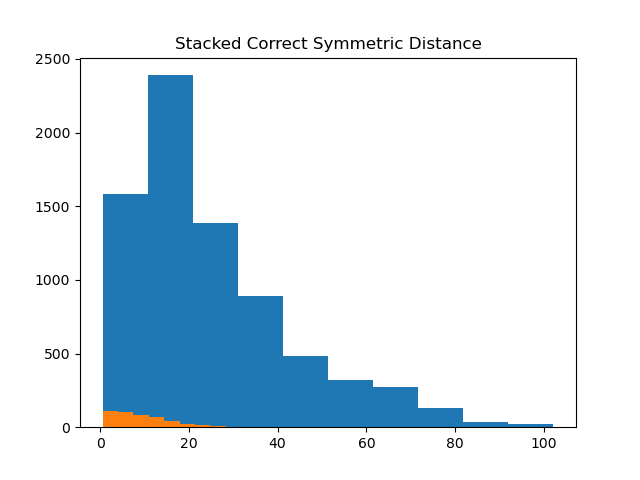

In [51]:
# create histograms for each of the symmetric distances
plt.figure()
plt.hist(stacked_correct_sym_dist, bins=10)
plt.hist(stacked_incorrect_sym_dist, bins=10)
plt.title("Stacked Correct Symmetric Distance")

plt.show()


## Testing out different test sets at different symmetric_trap_distance values
Here, we are turning the dataset into different $\psi$ values to see how performance is affected

In [62]:
def run_all_models(X, t):
    print("\n======================\nSVM")
    sensitivity_specificity(confusion_matrix(t, svm_model.predict(X)), print_vals=True)
    print("\n======================\nSVM Poly")
    sensitivity_specificity(confusion_matrix(t, svm_poly_model.predict(X)), print_vals=True)
    print("\n======================\nKNN")
    
    sensitivity_specificity(confusion_matrix(t, knn_model.predict(X)), print_vals=True)
    print("\n======================\nAdaBoost")
    
    sensitivity_specificity(confusion_matrix(t, ada_model.predict(X)), print_vals=True)
    print("\n======================\nHistGradBoost")
    sensitivity_specificity(confusion_matrix(t, hist_model.predict(X)), print_vals=True)
    print("\n======================\nQuad")
    sensitivity_specificity(confusion_matrix(t, quad_model.predict(X)), print_vals=True)
    print("\n======================\nBagging")
    sensitivity_specificity(confusion_matrix(t, bag_model.predict(X)), print_vals=True)
    print("\n====================\nRandom Forest")
    sensitivity_specificity(confusion_matrix(t, rf_model.predict(X)), print_vals=True)
    print("\n======================\nStacked")
    sensitivity_specificity(confusion_matrix(t, stacked_model.predict(X)), print_vals=True)
    print("\n======================\nVoting")
    sensitivity_specificity(confusion_matrix(t, voting_model.predict(X)), print_vals=True)

In [63]:
bin_5 = [0,5]
bin_10 = [5,10]
bin_15 = [10,15]
bin_20 = [15,20]
bin_25 = [20,1000]

X_test_5 = X_test[np.where(np.logical_and(X_test[:,3] >= bin_5[0], X_test[:,3] < bin_5[1]))]
X_test_10 = X_test[np.where(np.logical_and(X_test[:,3] >= bin_10[0], X_test[:,3] < bin_10[1]))]
X_test_15 = X_test[np.where(np.logical_and(X_test[:,3] >= bin_15[0], X_test[:,3] < bin_15[1]))]
X_test_20 = X_test[np.where(np.logical_and(X_test[:,3] >= bin_20[0], X_test[:,3] < bin_20[1]))]
X_test_25 = X_test[np.where(np.logical_and(X_test[:,3] >= bin_25[0], X_test[:,3] < bin_25[1]))]

t_test_5 = t_test[np.where(np.logical_and(X_test[:,3] >= bin_5[0], X_test[:,3] < bin_5[1]))]
t_test_10 = t_test[np.where(np.logical_and(X_test[:,3] >= bin_10[0], X_test[:,3] < bin_10[1]))]
t_test_15 = t_test[np.where(np.logical_and(X_test[:,3] >= bin_15[0], X_test[:,3] < bin_15[1]))]
t_test_20 = t_test[np.where(np.logical_and(X_test[:,3] >= bin_20[0], X_test[:,3] < bin_20[1]))]
t_test_25 = t_test[np.where(np.logical_and(X_test[:,3] >= bin_25[0], X_test[:,3] < bin_25[1]))]

# get predictions from each model for each of the different test sets
print("========================5/5/5/5/5/5=========================\n"*5)
print("Number of samples: ", X_test_5.shape[0])
run_all_models(X_test_5, t_test_5)
print("====================10/10/10/10/10=============================\n"*5)
print("Number of samples: ", X_test_10.shape[0])
run_all_models(X_test_10, t_test_10)
print("=======================15/15/15/15/15/15==========================\n"*5)
print("Number of samples: ", X_test_15.shape[0])
run_all_models(X_test_15, t_test_15)
print("=========================20/20/20/20/20========================\n"*5)
print("Number of samples: ", X_test_20.shape[0])
run_all_models(X_test_20, t_test_20)
print("==========================25/25/25/25/25/25=======================\n"*5)
print("Number of samples: ", X_test_25.shape[0])
run_all_models(X_test_25, t_test_25)


========================5/5/5/5/5/5=========================
========================5/5/5/5/5/5=========================
========================5/5/5/5/5/5=========================
========================5/5/5/5/5/5=========================
========================5/5/5/5/5/5=========================

Number of samples:  473

SVM
Accuracy:  63.849999999999994
Sensitivity:  73.22999999999999
Specificity:  60.4
F1:  0.521

SVM Poly
Accuracy:  56.24
Sensitivity:  63.85999999999999
Specificity:  54.620000000000005
F1:  0.3387

KNN
Accuracy:  64.9
Sensitivity:  65.38000000000001
Specificity:  64.53
F1:  0.621

AdaBoost
Accuracy:  59.41
Sensitivity:  59.69
Specificity:  59.209999999999994
F1:  0.5493

HistGradBoost
Accuracy:  70.39999999999999
Sensitivity:  75.0
Specificity:  67.58
F1:  0.6585

Quad
Accuracy:  51.160000000000004
Sensitivity:  47.620000000000005
Specificity:  51.33
F1:  0.0797

Bagging
Accuracy:  70.39999999999999
Sensitivity:  72.28
Specificity:  69.0
F1:  0.6759

Random 

# Naive Test Set Performance
Here, we are applying the trained models to our Naive test set.

One can easily change the Naive test set by changing the values of `test_subjects` and `train_subjects` at the very beginning of this notebook. If done, all models need to be retrained.

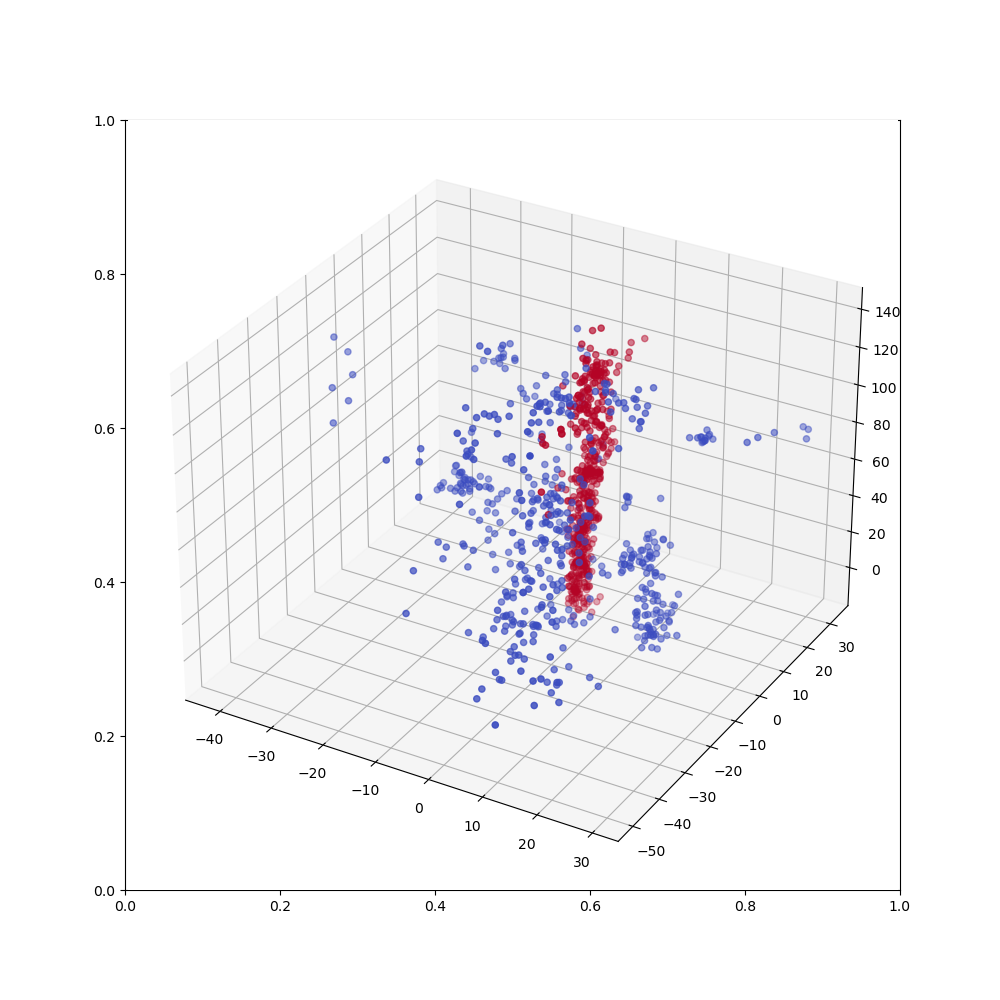

In [55]:
# Create data for the test set

X_test_naive, t_test_naive = create_symmetry_trap_dataset_and_labels(test_df)

# visualize the data

# want to create a 3d scatter plot of the kinematics
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter3D(X_test_naive[:, 0], X_test_naive[:, 1], X_test_naive[:, 2], c=t_test_naive, cmap="coolwarm")

In [58]:
def run_all_models(X, t, models):
    for model in models:
        print("\n======================\n", model)
        sensitivity_specificity(confusion_matrix(t, model.predict(X)), print_vals=True)
        

In [57]:
models = [
    svm_model,
    svm_poly_model,
    knn_model,
    ada_model,
    hist_model,
    quad_model,
    bag_model,
    rf_model,
    stacked_model,
    voting_model,
]

run_all_models(X_test_naive, t_test_naive, models)


 SVC(C=1000, gamma=0.001)
Accuracy:  94.21000000000001
Sensitivity:  97.11999999999999
Specificity:  91.64
Precision:  91.12
Recall:  97.11999999999999
F1:  0.9402

 SVC(C=1000, degree=2, kernel='poly')
Accuracy:  92.08
Sensitivity:  96.58
Specificity:  88.38000000000001
Precision:  87.26
Recall:  96.58
F1:  0.9168

 KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
Accuracy:  90.93
Sensitivity:  93.62
Specificity:  88.55
Precision:  87.83999999999999
Recall:  93.62
F1:  0.9064

 AdaBoostClassifier(n_estimators=200)
Accuracy:  92.86
Sensitivity:  97.23
Specificity:  89.22
Precision:  88.22
Recall:  97.23
F1:  0.9251

 HistGradientBoostingClassifier()
Accuracy:  93.24
Sensitivity:  96.67
Specificity:  90.29
Precision:  89.58
Recall:  96.67
F1:  0.9299

 QuadraticDiscriminantAnalysis(reg_param=0.4)
Accuracy:  91.7
Sensitivity:  97.37
Specificity:  87.24
Precision:  85.71
Recall:  97.37
F1:  0.9117

 BaggingClassifier(max_samples=0.7, n_estimators=500, n_jobs=-1)
Accuracy:  93

In [81]:
# length of naive test set

print("Length of Naive Test Set: ", (X_test_naive.shape[0])/2)

# length of original test set

print("Length of original dataset: ", (X_random.shape[0]))

print("Total number of samples: ", (X_test_naive.shape[0] + X_random.shape[0]))

Length of Naive Test Set:  518.0
Length of original dataset:  24148
Total number of samples:  25184
